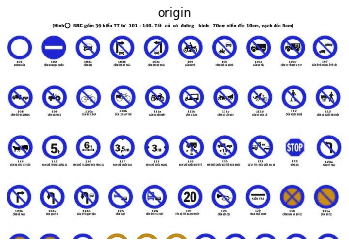

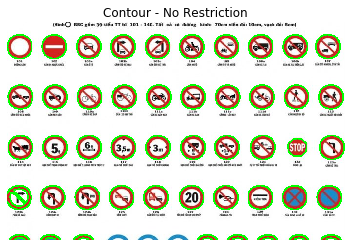

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import random
import os

import shutil
def imreadx(url,img_name):
    img = io.imread(url)
    outimg = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
#     cv2.imwrite(img_name,outimg)
    
    return outimg
def imshowx(img,title='B2DL'):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size
    
    plt.axis('off')
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()
def imshowgrayx(img,title='BD2L'):
    plt.axis('off')
    plt.title(title)
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()

def checkWidthHeight(cnt):
    x,y,w,h=cv2.boundingRect(cnt)
    a,b,c,d = x,y,w,h
   
    widthDivisionHeightRatio = w/h
   
    if widthDivisionHeightRatio <= 1.5 and widthDivisionHeightRatio >= 0.6:
        if w <= 30 or h <= 30:
            return False
        else:  
#             print('x:'+str(x))
#             print('y:'+str(y))
#             print('w:'+str(w))
#             print('h:'+str(h))
#             print('w/h:'+str(widthDivisionHeightRatio))
            return True
    else:
        return False
    
def caculateColorPixelPercent(link,colorRangeObject):
    minRange1 = colorRangeObject['minRange1']
    maxRange1 = colorRangeObject['maxRange1']
    minRange2 = colorRangeObject['minRange2']
    maxRange2 = colorRangeObject['maxRange2']
    img = cv2.imread(link)
    size = img.size
    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    mask_r1 = cv2.inRange(hsv,minRange1,maxRange1)
    mask_r2 = cv2.inRange(hsv,minRange2,maxRange2)
    mask_r = cv2.bitwise_or(mask_r1,mask_r2)
#     imshowgrayx(mask_r,'Mask for Red Region')
    target = cv2.bitwise_and(img,img,mask=mask_r)
    num_brown = cv2.countNonZero(mask_r)
    perc_brown = num_brown/float(w*h)*100
    return perc_brown
    
def checkColorPercent(link):
    red = {
        'minRange1' : (0,100,100),
        'maxRange1' : (10,255,255),
        'minRange2' : (160,100,100),
        'maxRange2' : (180,255,255),
    }
    white = {
        'minRange1' :np.array([0,0,168]),
        'maxRange1' :np.array([172,111,255]),
        'minRange2' :np.array([0,0,168]),
        'maxRange2' :np.array([172,111,255]),
    }
    
    redPercent =  caculateColorPixelPercent(link,red)
    whitePercent = caculateColorPixelPercent(link,white)
    print(redPercent)
    print(whitePercent)
    
    if redPercent >= 20 and whitePercent>= 10:
        return True
    else:
        return False
    

    
url = 'http://daotaonhanluc.vn/wp-content/uploads/2017/07/31-1514-690x445.jpg'
tds_img = 'tds-1.jpg'
img = imreadx(url,tds_img)
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
mask_r1 = cv2.inRange(hsv,(0,100,100),(10,255,255))
imshowgrayx(img,'origin')
mask_r2 = cv2.inRange(hsv,(160,100,100),(180,255,255))
# imshowgrayx(mask_r2,'Mask Range 2')
mask_r = cv2.bitwise_or(mask_r1,mask_r2)
# imshowgrayx(mask_r,'Mask for Red Region')
target = cv2.bitwise_and(img,img,mask=mask_r)
# imshowx(target,'Mask for Red Rigon')
gblur = cv2.GaussianBlur(mask_r,(9,9),0)
edge_img = cv2.Canny(gblur,30,150)
# imshowgrayx(edge_img,'edge map')
img2 = img.copy()
itmp, cnts, hierarchy = cv2.findContours(edge_img.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# cnts, hierarchy = cv2.findContours(edge_img.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img2,cnts,-1,(0,255,0),2)
imshowx(img2,'Contour - No Restriction')



In [6]:
img2=img.copy()
directory = '/Volumes/home/khoi/Project/traffic_sign_detection/media'
shutil.rmtree(directory) 
os.mkdir(directory)
os.chdir(directory+'/') 
for index, cnt in enumerate(cnts):
    try:
        area = cv2.contourArea(cnt)
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(img2,ellipse,(0,255,0),2)
        isAcceptWidthHeightImage = checkWidthHeight(cnt)
        if isAcceptWidthHeightImage == True:
            x,y,w,h=cv2.boundingRect(cnt)
            crop = img[y:y+h, x:x+w]
#             imshowx(crop,'Crop')
            filename = str(index)+'_crop.jpg'
            print('  ')
            print(filename)
            cv2.imwrite(filename, crop) 
            cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),3)
            isAcceptColorPercent = checkColorPercent(filename)
            if isAcceptColorPercent != True:
                os.remove(filename)
                print('remove'+filename)
    except NameError:
        print("ex")
    except:
        print("er")
    


er
er
  
20_crop.jpg
39.13725490196078
23.45098039215686
  
21_crop.jpg
44.28
20.64
  
22_crop.jpg
37.32
51.88
  
23_crop.jpg
42.509803921568626
53.17647058823529
  
24_crop.jpg
37.64
45.28
  
25_crop.jpg
46.64
48.8
  
26_crop.jpg
44.800000000000004
51.68000000000001
  
27_crop.jpg
42.23529411764706
48.745098039215684
  
28_crop.jpg
42.745098039215684
50.94117647058823
  
29_crop.jpg
42.96
51.559999999999995
  
30_crop.jpg
52.5987525987526
42.68884268884269
  
31_crop.jpg
43.24
51.32
  
32_crop.jpg
42.31372549019608
51.5686274509804
  
33_crop.jpg
42.549019607843135
49.92156862745098
  
34_crop.jpg
43.4
47.44
  
35_crop.jpg
37.96
56.24
  
36_crop.jpg
37.09803921568627
53.764705882352935
  
37_crop.jpg
37.64
51.68000000000001
  
38_crop.jpg
37.44
52.52
  
39_crop.jpg
43.04
47.44
  
40_crop.jpg
43.04
48.120000000000005
  
41_crop.jpg
43.04
52.32
  
42_crop.jpg
42.27450980392157
51.294117647058826
  
43_crop.jpg
42.392156862745104
49.333333333333336
  
44_crop.jpg
43.120000000000005
47.19